In [1]:
import netket as nk
import json
from qutip import *
import numpy as np
import time
import multiprocessing as mp
from collections import OrderedDict
from pickle import dump
import os
import matplotlib.pyplot as plt
import scipy
from matplotlib import gridspec
from functools import reduce
plt.style.use('seaborn')
from scipy.stats import norm

In [2]:
#Data extraction for exact_full, exact_lan, and SR
N = [2,3,4,5,6,7,8,9,10,11,12]

#load SR runtime, need to average and avoid the first value
SR_con = []
SR_diff = []
for i in range(2,13,1):
    with open('2021_summer_data/con_'+'N'+str(i)+'M'+str(i)+'.json') as f:
        for line in f:
            SR_con.append(json.loads(line))
    SR_avg = np.average(SR_con[2][1:])
    SR_diff_ = np.abs(SR_avg-SR_con[2][0])
    SR_diff.append(SR_diff_)
    SR_con = []
print(SR_diff)

[8.008593729564122, 8.76392133381902, 8.394812549863541, 7.7703328278599955, 10.118106666876344, 9.975600904347942, 9.302042036640401, 7.062389203480308, 9.068433012281147, 13.085541005037271, 7.41898673894454]


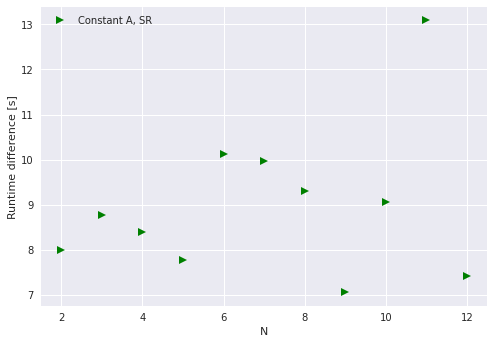

In [4]:
plt.plot(N,SR_diff,'g>',markersize=8,label='Constant A, SR')
plt.ylabel('Runtime difference [s]')
plt.xlabel('N')
plt.legend()
plt.show()

In [10]:
#Data extraction for exact_full, exact_lan, and SR
N_ = [2,3,4,5,6,7,8]

#load SR runtime, need to average and avoid the first value
SR_var = []
SR_diff_var = []
for i in range(2,9,1):
    with open('2021_summer_data/partial/var_'+'N'+str(i)+'M'+str(i)+'.json') as f:
        for line in f:
            SR_var.append(json.loads(line))
    SR_avg = np.average(SR_var[2][1:])
    SR_diff_ = np.abs(SR_avg-SR_var[2][0])
    SR_diff_var.append(SR_diff_)
    SR_var = []
print(SR_diff_var)

[9.074362594254163, 9.629273959568568, 9.926606236671915, 11.001044351227428, 11.021187558466075, 12.589358461146453, 10.11952512118281]


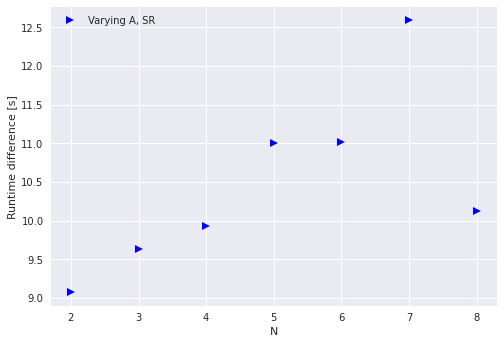

In [12]:
plt.plot(N_,SR_diff_var,'b>',markersize=8,label='Varying A, SR')
plt.ylabel('Runtime difference [s]')
plt.xlabel('N')
plt.legend()
plt.show()